In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [159]:
listings = pd.read_csv('data/listings.csv.gz',compression='gzip')
reviews = pd.read_csv('data/reviews.csv.gz',compression='gzip')

In [171]:
listings_clean = listings[['id','name','host_id','host_name','host_is_superhost','neighbourhood_cleansed','price','number_of_reviews']]
listings_clean.loc[:,'neighbourhood'] = listings_clean.loc[:,'neighbourhood_cleansed']
listings_clean = listings_clean.drop('neighbourhood_cleansed',1)

listings_clean.loc[:,'price'] = listings_clean.loc[:,'price'].str.replace('$','').str.replace(',','').astype(float)

reviews_clean = reviews[['listing_id','date']]

reviews_clean.loc[:,'year'] = reviews_clean.loc[:,'date'].str.split('-',n = 1,expand=True)[0].astype(int)

montreal_airbnb = pd.merge(listings_clean,reviews_clean,how='inner',left_on='id',right_on='listing_id')


# 1)

<AxesSubplot:ylabel='neighbourhood'>

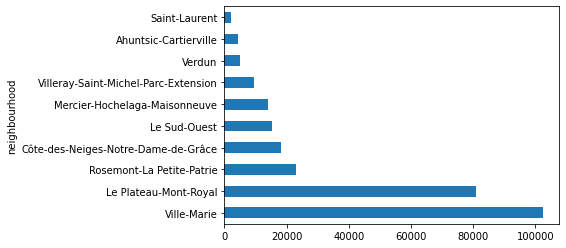

In [165]:
top_10_reviews = listings_clean.groupby('neighbourhood').sum().sort_values('number_of_reviews', ascending = False).head(n=10)
top_10_reviews['number_of_reviews'].plot.barh()

# 2)

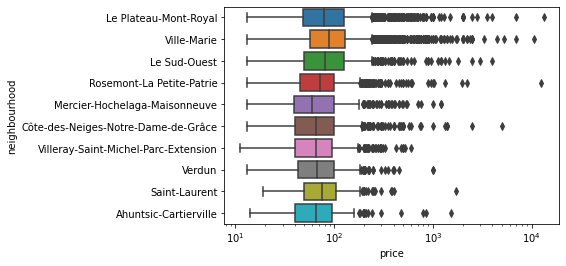

In [164]:
top_10_listings = listings_clean[listings_clean['neighbourhood'].isin(top_10_reviews.index)]
fig = sns.boxplot(y = 'neighbourhood', x = 'price', data = top_10_listings)
fig.set_xscale("log")

# 3)

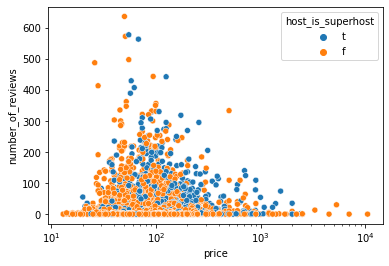

In [166]:
villemarie_airbnb = top_10_listings[top_10_listings['neighbourhood'].isin(['Ville-Marie'])]
fig_2 = sns.scatterplot(x = 'price', y = 'number_of_reviews', hue = 'host_is_superhost',data = villemarie_airbnb)
fig_2.set_xscale("log")

# 4)

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

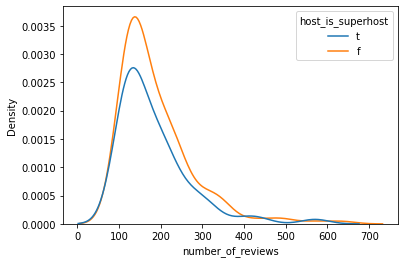

In [169]:
sns.kdeplot(data = villemarie_airbnb[villemarie_airbnb['number_of_reviews']>100], x = 'number_of_reviews', hue = 'host_is_superhost')

# 5)

<AxesSubplot:xlabel='year'>

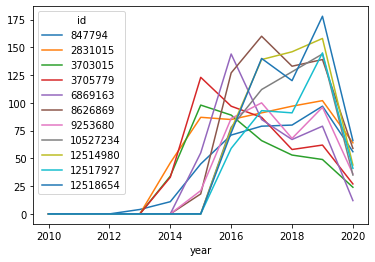

In [152]:
x = villemarie_airbnb.loc[:,['year','id']]
x['count'] = 0
y = x.groupby(['year','id']).count().unstack(1).fillna(0)
y.columns = y.columns.droplevel()
z = y.sum()
y[z[z>400].index].plot()